In [1]:
#    (.....Libs.....)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv( 'housePrice.csv' )
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [4]:
condition = df[ 'Parking' ] == True
condition = df[ 'Warehouse' ] == True
condition = df[ 'Elevator' ] == True
new_value = 1
df.loc[condition, 'Parking'] = new_value
df.loc[condition, 'Warehouse'] = new_value
df.loc[condition, 'Elevator'] = new_value
df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


In [5]:
items = []
for item in df[ 'Area' ] :
    items.append( item.replace( ',', '' ).strip() )
df[ 'Area' ] = items

for item in df[ 'Area' ] :
    if int( item ) >= 1200 :
        df[ 'Area' ] = df[ 'Area' ].replace( item, None)

df = df.dropna()

df.describe()

,Room,Price,Price(USD)
count,3451.000000,3.451000e+03,3.451000e+03
mean,2.081136,5.376033e+09,1.792011e+05
std,0.760107,8.124787e+09,2.708262e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.419500e+09,4.731667e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


In [50]:
cdf = df[[ 'Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price' ]]
cdf.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,1,1,1,Shahran,1.850000e+09
1,60,1,1,1,1,Shahran,1.850000e+09
2,79,2,1,1,1,Pardis,5.500000e+08
3,95,2,1,1,1,Shahrake Qods,9.025000e+08
4,123,2,1,1,1,Shahrake Gharb,7.000000e+09


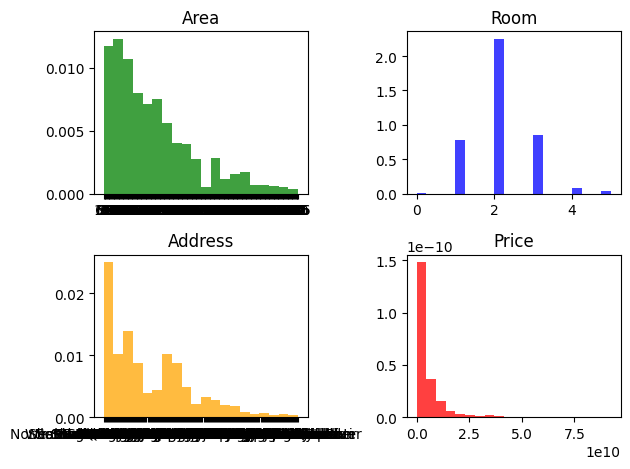

In [103]:
fig, axs = plt.subplots( nrows=2, ncols=2 )

axs[0, 0].hist( cdf['Area'], 20, density=True, histtype='bar', facecolor='g', alpha=0.75)
axs[0, 0].set_title('Area')
axs[0, 1].hist( cdf['Room'], 20, density=True, histtype='bar', facecolor='b', alpha=0.75)
axs[0, 1].set_title('Room')
axs[1, 0].hist( cdf['Address'], 20, density=True, histtype='bar', facecolor='orange', alpha=0.75)
axs[1, 0].set_title('Address')
axs[1, 1].hist( cdf['Price'], 20, density=True, histtype='bar', facecolor='r', alpha=0.75)
axs[1, 1].set_title('Price')

plt.tight_layout()
plt.show()

In [66]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
cdf['encoded_column'] = encoder.fit_transform(cdf['Address'])

In [113]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [114]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[[ 'Area', 'encoded_column', 'Room', 'Parking' ]])
y = np.asanyarray(train[[ 'Price' ]])
regr.fit (x, y)
# The coefficients
print('Coefficients : ', regr.coef_ )
print('Intercept : ', regr.intercept_ )

Coefficients :  [[5.87776816e+07 2.66305700e+05 2.33581019e+09 4.53422521e+08]]
Intercept :  [-6.31522758e+09]


Text(0, 0.5, 'Price')

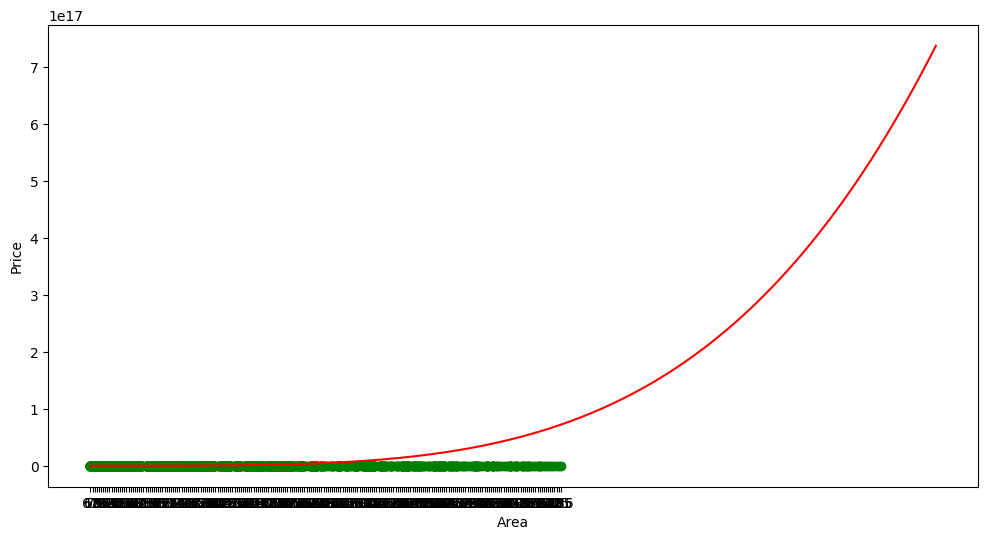

In [123]:
plt.figure(figsize=(12, 6))
plt.scatter( train.Area, train.Price,  color='green' )
sx = np.arange( 0.0, 200, 0.5 ) #len( cdf[ 'Price' ])
plt.plot( regr.intercept_[0] + regr.coef_[0][0]*sx + regr.coef_[0][1]*np.power( sx, 2) + regr.coef_[0][2]*np.power( sx, 3) + regr.coef_[0][3]*np.power( sx, 4), '-r')
plt.xlabel( "Area" )
plt.ylabel( "Price" )

In [124]:
y_hat= regr.predict( test[[ 'Area', 'encoded_column', 'Room', 'Parking' ]])
xx = np.asanyarray( test[[ 'Area', 'encoded_column', 'Room', 'Parking' ]])
yy = np.asanyarray( test[[ 'Price' ]])

print("Residual sum of squares: %.2f" % np.mean(( y_hat - yy ) ** 2 ))
print('Variance score: %.2f' % regr.score( xx, yy ))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score( yy, y_hat ))

Residual sum of squares: 37844132819096068096.00
Variance score: 0.51
R2-score: 0.51


X:\Programing\Python\Environment\InstallerPack\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
